# Cyberbullying Detection and Classification | Natural Language Processing

Cyberbullying Detection and Classification Framework
1. Data Aquisition
2. Data Pre-Processing 
    - Cleaning 
    - Tokenization
    - Lemmatization
3. Data Partioning
4. Vectorization and Feature Engineering
5. Machine Learning Model Training
6. Machine Learning Model Testing
7. Analysis of Machine Learning Model

### Data Aquisition

Data Source:
    
Title: [Cyberbullying Classification Dataset](https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification)  
Author(s): J. Wang, K. Fu, C.T. Lu  
Orginial Publication: Kaggle

In [1]:
import pandas as pd

df = pd.read_csv("cyberbullying_tweets.csv")
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


*Check the data for any null values.*  

In [2]:
df.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [3]:
df["cyberbullying_type"].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

*Remove extra data categories (bullying based on age and other) and their associated data.*

In [4]:
df = df[(df["cyberbullying_type"] != "other_cyberbullying") & (df["cyberbullying_type"] != "age")]

df["cyberbullying_type"].value_counts()

religion             7998
gender               7973
ethnicity            7961
not_cyberbullying    7945
Name: cyberbullying_type, dtype: int64

*Plot histograms of the tweet length correlating to each cyberbullying category.*

In [5]:
import matplotlib.pyplot as plt

df['tweet_length'] = df['tweet_text'].apply(len)

def plot_hist_for_cyberbullying_type(df, cyberbullying_type):
    df_type = df[df['cyberbullying_type'] == cyberbullying_type]
    plt.figure(figsize=(10, 6))
    plt.hist(df_type['tweet_length'], bins=30, alpha=0.5, label=cyberbullying_type)
    plt.title('Histogram of tweet length for type: ' + cyberbullying_type)
    plt.xlabel('Tweet length')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

/var/folders/c5/zc1qm_gn7fj_xqphdl7x9wt40000gn/T/ipykernel_1374/1535986695.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tweet_length'] = df['tweet_text'].apply(len)


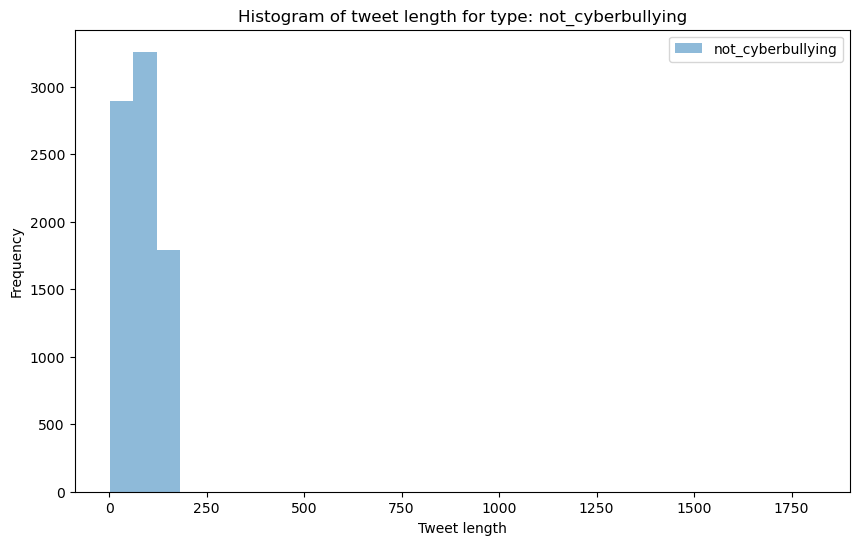

In [6]:
plot_hist_for_cyberbullying_type(df, 'not_cyberbullying')

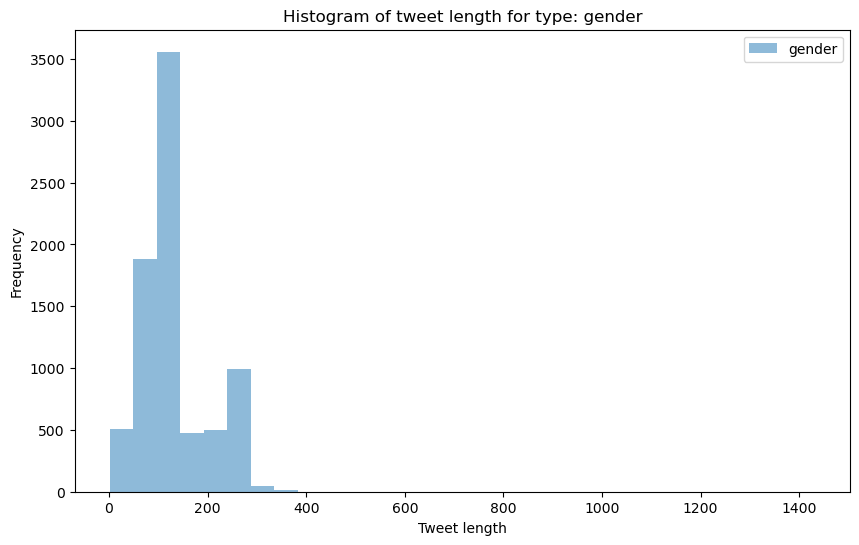

In [7]:
plot_hist_for_cyberbullying_type(df, 'gender')

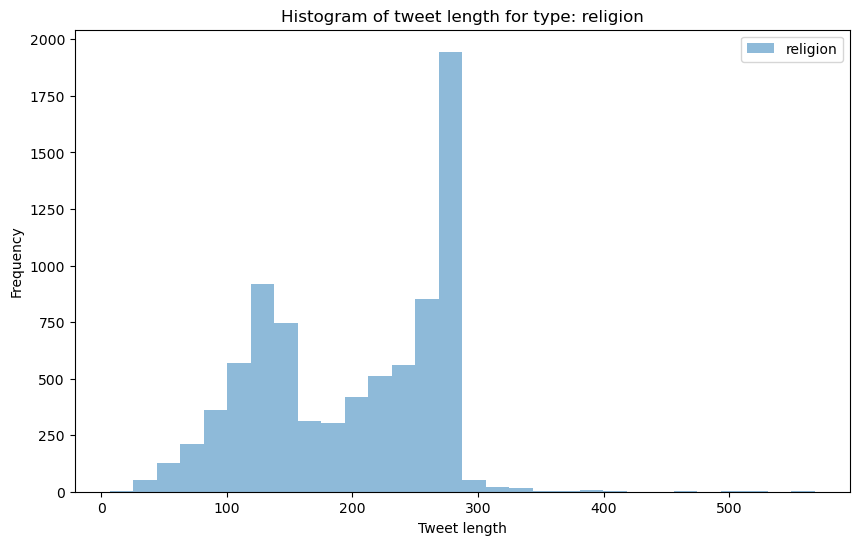

In [8]:
plot_hist_for_cyberbullying_type(df, 'religion')

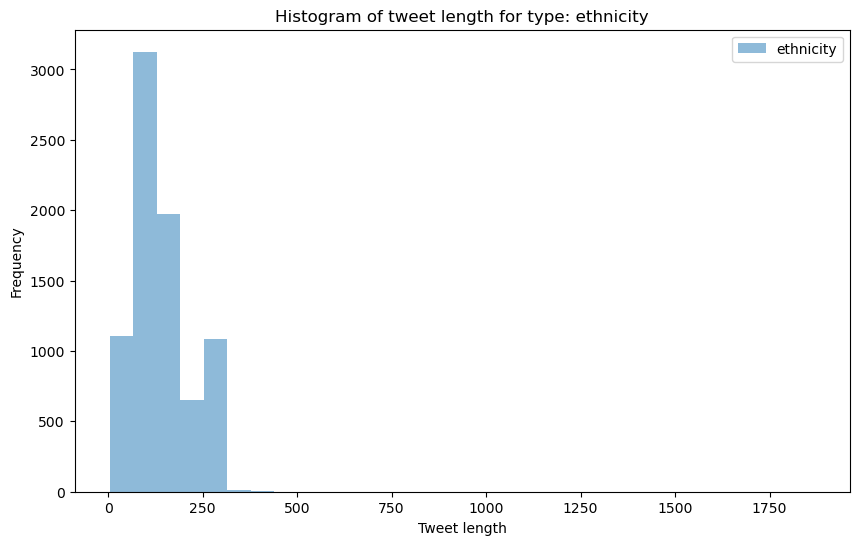

In [9]:
plot_hist_for_cyberbullying_type(df, 'ethnicity')

### Data Pre-Processing

Data pre-processing occurs in 3 Steps:
1. Cleaning
2. Tokeinzation
3. Lemmatization

#### Cleaning

Cleaning entails the following:
- Removal of HTML Tags
- Removal of URL's
- Removal of User Mentions
- Removal of Hashtags
- Removal of Emojis
- Removal of Non-Unicode Characters
- Removal of Numbers
- Removal of Punctuation
- Removal of Non-English Characters
- Removal of Extra Spaces
- Removal of Stop Words
- Lowerization of all Characters

*Create methods for each cleaning requirement.*

In [10]:
import re

def remove_html_tags(text):
    return re.sub(r'<.*?>', '', text)

def remove_urls(text):
    return re.sub(r'http\S+|www.\S+', '', text)

def remove_mentions(text):
    return re.sub(r'@[\w]*', '', text)

def remove_hashtags(text):
    return re.sub(r'#[\w]*', '', text)

def remove_emojis(text):
    return re.sub(r'[\U00010000-\U0010ffff]', '', text)

def remove_non_unicode(text):
    return re.sub(r'[^\x00-\x7F]+', '', text)

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

def remove_non_english(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

def remove_extra_spaces(text):
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

def clean_data(text):
    text = remove_html_tags(text)
    text = remove_urls(text)
    text = remove_mentions(text)
    text = remove_hashtags(text)
    text = remove_emojis(text)
    text = remove_non_unicode(text)
    text = remove_numbers(text)
    text = remove_punctuation(text)
    text = remove_non_english(text)
    text = remove_extra_spaces(text)
    return text.lower()

*Clean the data.*

In [11]:
df["tweet_text"] = df["tweet_text"].apply(clean_data)

/var/folders/c5/zc1qm_gn7fj_xqphdl7x9wt40000gn/T/ipykernel_1374/859308912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tweet_text"] = df["tweet_text"].apply(clean_data)


In [12]:
df

,tweet_text,cyberbullying_type,tweet_length
0,in other words your food was crapilicious,not_cyberbullying,61
1,why is so white,not_cyberbullying,115
2,a classy whore or more red velvet cupcakes,not_cyberbullying,60
3,meh p thanks for the heads up but not too conc...,not_cyberbullying,103
4,this is an isis account pretending to be a kur...,not_cyberbullying,103
...,...,...,...
47687,black ppl arent expected to do anything depend...,ethnicity,234
47688,turner did not withhold his disappointment tur...,ethnicity,276
47689,i swear to god this dumb nigger bitch i have g...,ethnicity,104
47690,yea fuck you rt if youre a nigger fucking unfo...,ethnicity,90


#### Tokenization and Lemmatization

*Use the command below when running this code for the first time.*

In [13]:
!python -m spacy download en_core_web_sm

In [14]:
import spacy

nlp = spacy.load("en_core_web_sm")

*Import the english stop words from spaCy.*

In [15]:
from spacy.lang.en import stop_words as sw

stop_words = sw.STOP_WORDS
print(stop_words)

{'twenty', 'after', 'over', 'made', 'no', 'such', 'hereby', "'ll", 'elsewhere', 'serious', 'first', 'upon', 'afterwards', 'whoever', 'could', 'they', 'anyone', 'than', 'fifteen', 'together', 'its', 'something', 'an', 'empty', 'whereas', 'besides', 'why', 'nine', 'during', 'any', 'for', 'being', 'thereupon', 'ten', 'forty', 'become', 'put', 'towards', 'did', 'unless', 'nowhere', 'may', 'whom', 'amongst', 'seemed', 'although', 'well', 'therein', 'some', 'would', 'move', 'front', 're', 'until', 'above', 'us', 'somehow', 'their', "'re", 'below', 'yet', 'latter', 'less', 'there', 'that', 'here', 'yours', 'beforehand', 'two', 'before', 'various', 'rather', 'themselves', 'most', 'yourself', 'within', 'between', 'hence', 'she', 'too', '’ll', '‘d', 'should', 'same', 'to', 'other', 'few', 'across', "'s", 'among', 'toward', 'latterly', 'third', 'because', 'anywhere', 'else', 'himself', 'only', 'go', 'in', 'me', 'quite', 'against', 'whatever', 'several', 'namely', 'again', 'and', 'get', 'very', 'n

In [16]:
stop_words.add('rt')

*Tokenize each tweet text using spaCy.  
Filter tokens that are stop words.  
Lammatize each token using spaCy.  
Update the dataframe.*

In [17]:
processed_texts = []

for index, row in df.iterrows():
    doc = nlp(row["tweet_text"])
    new_tokens = []
    
    for token in doc:
        if token.text.lower() not in stop_words:
            new_tokens.append(token.lemma_)
    
    new_text = " ".join(new_tokens)
    processed_texts.append(new_text)


df["tweet_text"] = processed_texts

/var/folders/c5/zc1qm_gn7fj_xqphdl7x9wt40000gn/T/ipykernel_1374/2434267760.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tweet_text"] = processed_texts


In [18]:
df

,tweet_text,cyberbullying_type,tweet_length
0,word food crapilicious,not_cyberbullying,61
1,white,not_cyberbullying,115
2,classy whore red velvet cupcake,not_cyberbullying,60
3,meh p thank head concerned angry dude twitter,not_cyberbullying,103
4,isis account pretend kurdish account like isla...,not_cyberbullying,103
...,...,...,...
47687,black ppl not expect depend free participate w...,ethnicity,234
47688,turner withhold disappointment turner call cou...,ethnicity,276
47689,swear god dumb nigger bitch get bleach hair re...,ethnicity,104
47690,yea fuck nigger fucking unfollow fucking dumb ...,ethnicity,90


*Plot horrizontal bar graphs depiciting the top 10 most occuring words in the text of tweets for every cyberbullying category.*

In [19]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np

def plot_common_words(df, t):
    vectorizer = CountVectorizer()
    type_df = df[df['cyberbullying_type'] == t]
    
    X = vectorizer.fit_transform(type_df['tweet_text'])

    word_freq = dict(zip(vectorizer.get_feature_names_out(), np.asarray(X.sum(axis=0)).ravel()))
    word_counter = Counter(word_freq)

    common_words = word_counter.most_common(10)

    words, counts = zip(*common_words)

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.barh(words, counts)
    ax.set_title(f'Common words for type: {t}')
    ax.set_xlabel('Counts')
    ax.invert_yaxis()

    plt.tight_layout()
    plt.show()

types = df['cyberbullying_type'].unique()

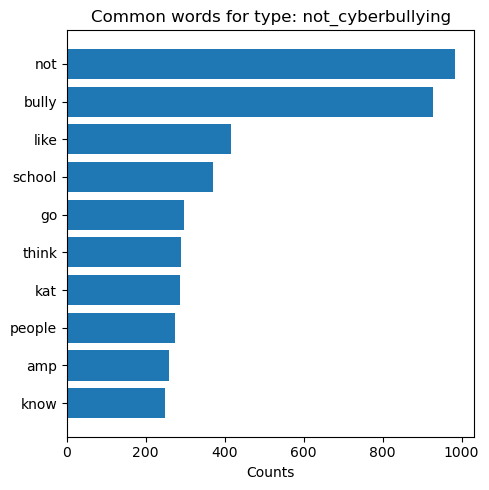

In [20]:
plot_common_words(df, types[0])

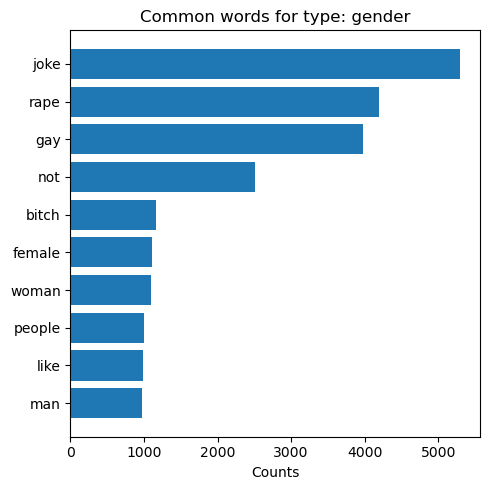

In [21]:
plot_common_words(df, types[1])

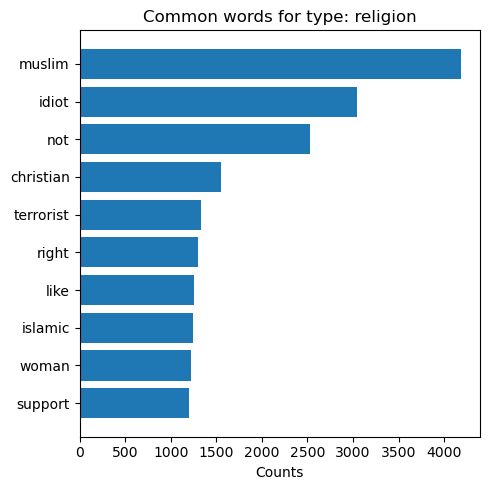

In [22]:
plot_common_words(df, types[2])

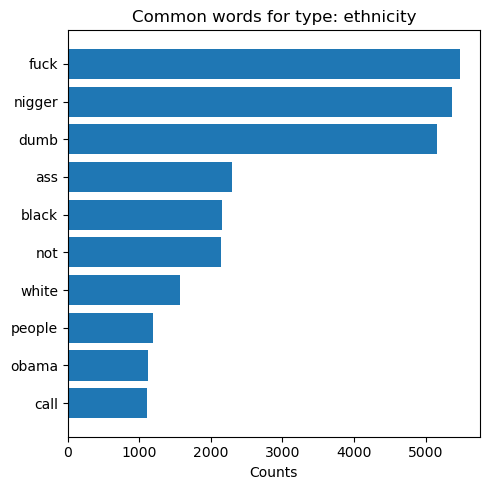

In [23]:
plot_common_words(df, types[3])

### Data Partioning

Data Partioning:
1. Training Data ~75%
2. Test Data ~25%

In [24]:
from sklearn.model_selection import train_test_split

X = df["tweet_text"]
y = df["cyberbullying_type"]

X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 0.25)

### Vectorization and Feature Engineering

*Create a pipeline for our machine learning model.*

In [25]:
from sklearn.pipeline import Pipeline 
from sklearn.svm import LinearSVC

cb_model = Pipeline([('tfidf', TfidfVectorizer()), ('Classifier', LinearSVC())])

### Machine Learning Model Training - Linear Support Vector Classification

In [26]:
cb_model.fit(X_Train, y_Train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('Classifier', LinearSVC())])

### Machine Learning Model Testing

In [27]:
predictions = cb_model.predict(X_Test)

### Analysis of Machine Learning Model

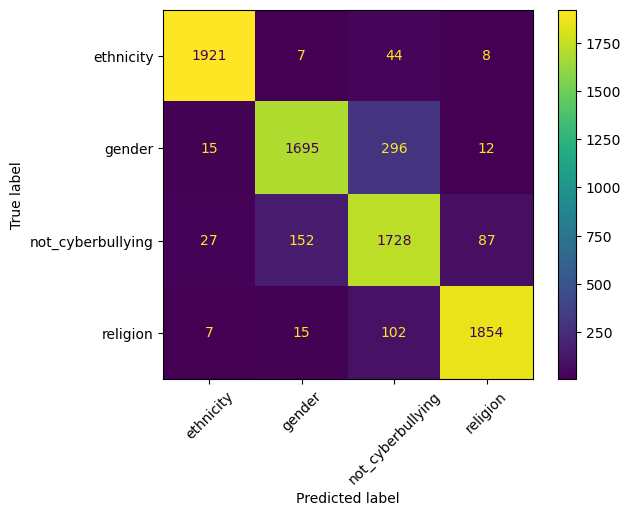

In [28]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_Test, predictions)

labels = np.unique(y_Test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=labels)

cm_display.plot()
plt.xticks(rotation=45)
plt.show()

In [29]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_Test, predictions))

                   precision    recall  f1-score   support

        ethnicity       0.98      0.97      0.97      1980
           gender       0.91      0.84      0.87      2018
not_cyberbullying       0.80      0.87      0.83      1994
         religion       0.95      0.94      0.94      1978

         accuracy                           0.90      7970
        macro avg       0.91      0.90      0.90      7970
     weighted avg       0.91      0.90      0.90      7970



In [30]:
print(accuracy_score(y_Test, predictions) * 100)

90.31367628607278


In [31]:
cb_model.predict(["enter text here..."])

array(['not_cyberbullying'], dtype=object)